In [1]:
# importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as up

In [2]:
#loading the dataset
df_census= pd.read_csv('CensusDB.csv')

#Checking the first two rows
df_census.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


## Data Exploration

In [3]:
#Checking the dimension of the dataset
df_census.shape

(32561, 14)

In [4]:
#Checking for the statistics
df_census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB



#### Data Cleaning

In [6]:
#checking for duplicates
df_census.duplicated().sum()

24

In [7]:
#dropping the row with the duplicate
df_census=df_census.drop_duplicates()

#confirming the duplicate is removed
df_census.duplicated().sum()

0

In [8]:
#Removing the unwanted character:?
df_census1= df_census.replace(to_replace=r'\?', value='NaN', regex=True)

#creating a new CSV file
df_census1.to_csv('df_census1.csv', index=False)
df_census1=pd.read_csv('df_census1.csv')

df_census1.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K


In [9]:
#Checking for the count of missing values
df_census1.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [10]:
#Checking for the specific rows with the missing values
missing=df_census1[df_census1.isnull().any(axis=1)]
missing


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,Female,0,4356,40,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Female,0,4356,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,Male,0,3004,60,NaN,>50K
14,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,Male,0,2824,40,United-States,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Male,0,2824,40,NaN,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,Female,0,0,55,United-States,>50K
32510,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Female,0,0,99,United-States,<=50K
32517,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,Male,0,0,10,United-States,>50K
32519,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Female,0,0,32,United-States,<=50K


In [11]:
# Checking for the most frequent variable in the workclass column
df_census1['workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
# Checking for the most frequent variable in the Occupation column
df_census1['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
# Checking for the most frequent variablein the native-country column
df_census1['native-country'].value_counts()

United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [14]:
#Replacing the missing values with the mode
for col in ['workclass','occupation']:
    df_census1[col].fillna(df_census1[col].mode()[0], inplace=True)   

In [15]:
df_census1.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    582
income              0
dtype: int64

In [16]:
#dropping the rows in the native-country with the missing values
df_census1.dropna(inplace=True)

In [17]:
#Checking to reconfirm that the dataset is now clean
df_census1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [18]:
#rechecking the size of the dataset after cleaning
df_census1.shape

#There are 31,955 rows and 14 columns in the dataset

(31955, 14)

In [19]:
#Checking for anomalies in age column
df_census1[df_census1.age == 0].shape

(0, 14)

In [20]:
#Checking for anomalies in age column
df_census1[df_census1.age == 100].shape

(0, 14)

In [21]:
#Checking for the unique values in the dataset
df_census1.apply(lambda x:len(x.unique()))

age                  73
workclass             8
fnlwgt            21406
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
income                2
dtype: int64

# Visualizations

In [22]:
# checking the size of the income earners
df_census1.groupby('income').size()

income
<=50K    24262
>50K      7693
dtype: int64

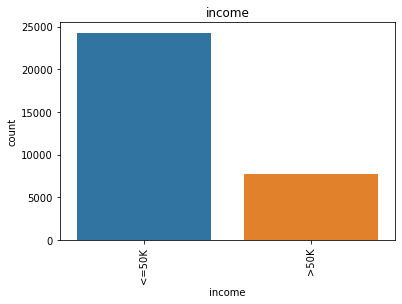

In [23]:
#Visualizing the distribution of Income
plt.title('income')
sns.countplot(x=df_census1['income'])
  
plt.xticks(rotation=90)
plt.show()

In [24]:
# checking the size of the workclass
df_census1.groupby('workclass').size()


workclass
Federal-gov           943
Local-gov            2067
Never-worked            7
Private             24073
Self-emp-inc         1074
Self-emp-not-inc     2498
State-gov            1279
Without-pay            14
dtype: int64

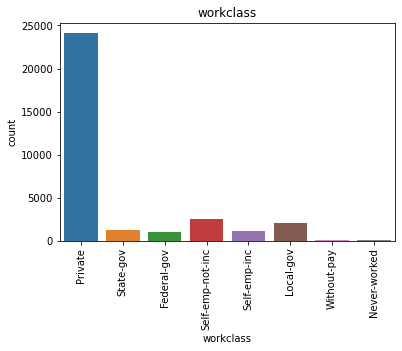

In [25]:
#Visualizing the distribution of the workclass
plt.title('workclass')
sns.countplot(x=df_census1['workclass'])
  
plt.xticks(rotation=90)
plt.show()

In [26]:
# checking the size of the education level
df_census1.groupby('education').size()

education
10th              921
11th             1167
12th              417
1st-4th           161
5th-6th           317
7th-8th           626
9th               506
Assoc-acdm       1055
Assoc-voc        1366
Bachelors        5208
Doctorate         390
HS-grad         10362
Masters          1673
Preschool          49
Prof-school       559
Some-college     7178
dtype: int64

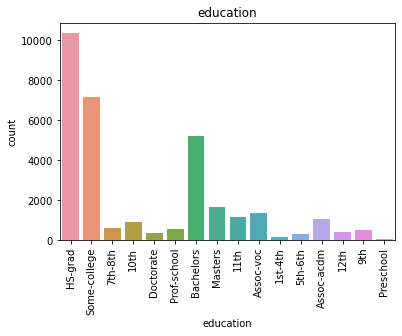

In [27]:
#Visualizing the distribution of the  Education
plt.title('education')
sns.countplot(x=df_census1['education'])
  
plt.xticks(rotation=90)
plt.show()

In [28]:
# checking the size of the marital status
df_census1.groupby('marital-status').size()

marital-status
Divorced                  4392
Married-AF-spouse           23
Married-civ-spouse       14686
Married-spouse-absent      397
Never-married            10473
Separated                 1005
Widowed                    979
dtype: int64

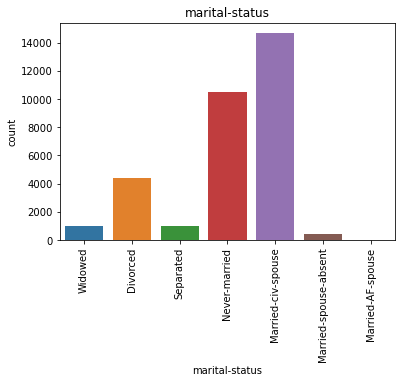

In [29]:
#Visualizing the distribution of the marital status
plt.title('marital-status')
sns.countplot(x=df_census1['marital-status'])
  
plt.xticks(rotation=90)
plt.show()

In [30]:
# checking the size of the occupation
df_census1.groupby('occupation').size()

occupation
Adm-clerical         3719
Armed-Forces            9
Craft-repair         4025
Exec-managerial      3991
Farming-fishing       987
Handlers-cleaners    1349
Machine-op-inspct    1964
Other-service        3209
Priv-house-serv       141
Prof-specialty       5850
Protective-serv       644
Sales                3584
Tech-support          911
Transport-moving     1572
dtype: int64

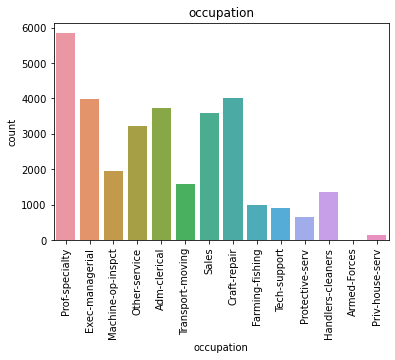

In [31]:
#Visualizing the distribution of the workclass
plt.title('occupation')
sns.countplot(x=df_census1['occupation'])
  
plt.xticks(rotation=90)
plt.show()

In [32]:
# checking the size of the relationship
df_census1.groupby('relationship').size()

relationship
Husband           12941
Not-in-family      8144
Other-relative      952
Own-child          5001
Unmarried          3383
Wife               1534
dtype: int64

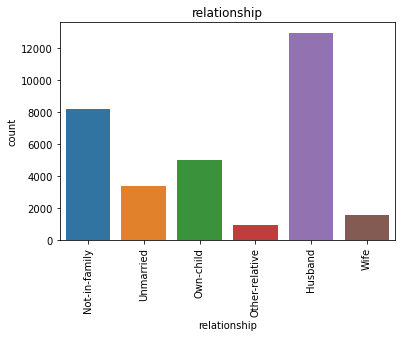

In [33]:
#Visualizing the distribution of the relationship
plt.title('relationship')
sns.countplot(x=df_census1['relationship'])
  
plt.xticks(rotation=90)
plt.show()

In [34]:
# checking the size of the Gender
df_census1.groupby('sex').size()

sex
Female    10599
Male      21356
dtype: int64

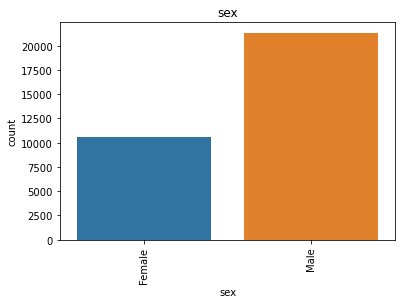

In [35]:
#Visualizing the distribution of the Gender
plt.title('sex')
sns.countplot(x=df_census1['sex'])
  
plt.xticks(rotation=90)
plt.show()

In [36]:
# checking the size of the native country
df_census1.groupby('native-country').size()

native-country
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        62
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          639
Nicaragua                        34
Outlying-US(G

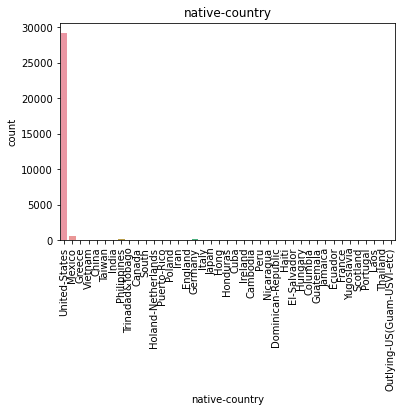

In [37]:
#Visualizing the distribution of the native country
plt.title('native-country')
sns.countplot(x=df_census1['native-country'])
  
plt.xticks(rotation=90)
plt.show()

### Visualizing income distribution within the categorical data

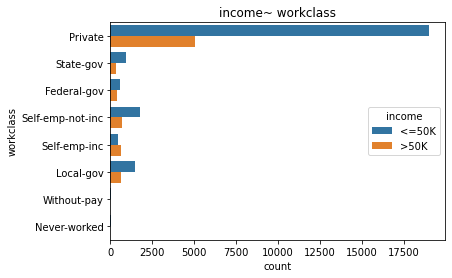

In [38]:
#Visualizing the income distribution within the workclass
plt.title('income~ workclass')
sns.countplot(y=df_census1['workclass'], hue=df_census1['income'] )
plt.show()

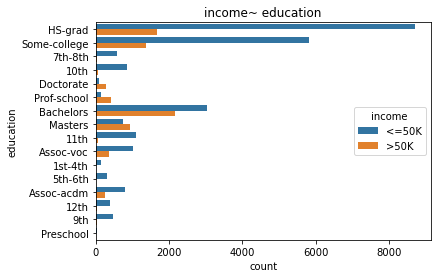

In [39]:
#Visualizing the income distribution within the levels of education
plt.title('income~ education')
sns.countplot(y=df_census1['education'], hue=df_census1['income'] )
plt.show()

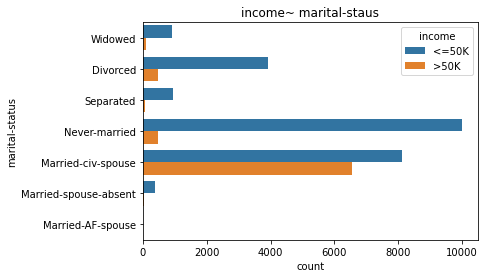

In [40]:
#Visualizing the income distribution within the marital status
plt.title('income~ marital-staus')
sns.countplot(y=df_census1['marital-status'], hue=df_census1['income'] )
plt.show()

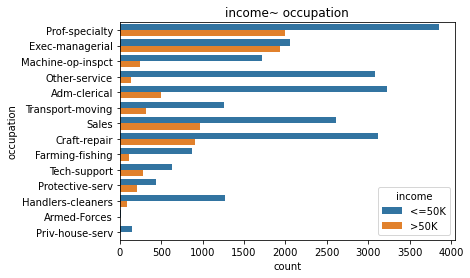

In [41]:
#Visualizing the income distribution within the occupations
plt.title('income~ occupation')
sns.countplot(y=df_census1['occupation'], hue=df_census1['income'] )
plt.show()

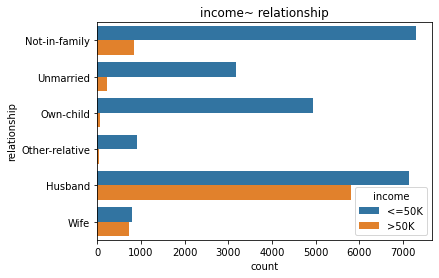

In [42]:
#Visualizing the income distribution within the relationships
plt.title('income~ relationship')
sns.countplot(y=df_census1['relationship'], hue=df_census1['income'] )
plt.show()

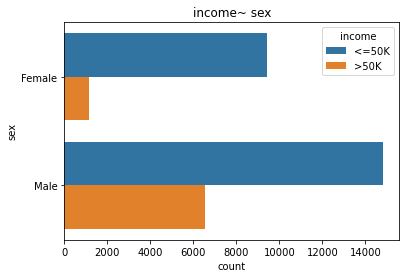

In [43]:
#Visualizing the income distribution within the Gender
plt.title('income~ sex')
sns.countplot(y=df_census1['sex'], hue=df_census1['income'] )
plt.show()

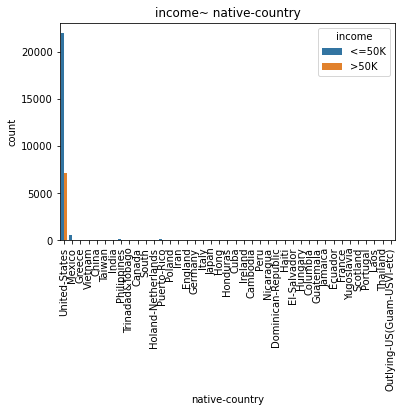

In [44]:
#Visualizing the income distribution within the native-country
plt.title('income~ native-country')
sns.countplot(x=df_census1['native-country'], hue=df_census1['income'])
plt.xticks(rotation=90)
plt.show()



### Visualizing the numerial features

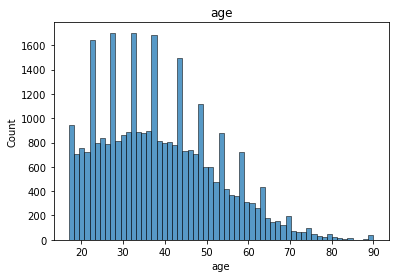

In [45]:
#Visualizing the distribution of age 
plt.figure()
sns.histplot(x='age', data=df_census)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('age')
plt.show()

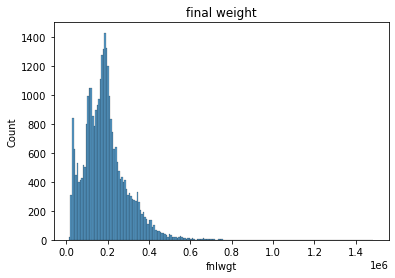

In [46]:
#Visualizing the distribution of the Final Weight
plt.figure()
sns.histplot(x='fnlwgt', data=df_census)
plt.xlabel('fnlwgt')
plt.ylabel('Count')
plt.title('final weight')
plt.show()



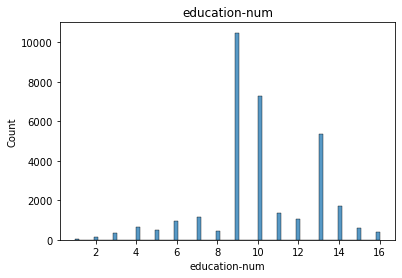

In [47]:
#Visualizing the distribution of the Education number
plt.figure()
sns.histplot(x='education-num', data=df_census)
plt.xlabel('education-num')
plt.ylabel('Count')
plt.title('education-num')
plt.show()

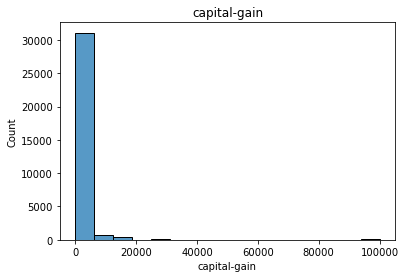

In [48]:
#Visualizing the distribution of the capital-gain
plt.figure()
sns.histplot(x='capital-gain', data=df_census)
plt.xlabel('capital-gain')
plt.ylabel('Count')
plt.title('capital-gain')
plt.show()

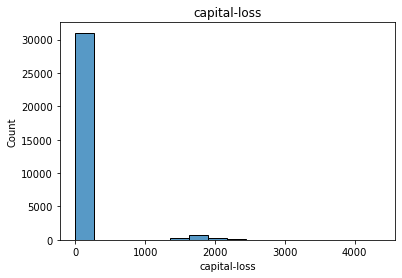

In [49]:
#Visualizing the distribution of the capital-loss
plt.figure()
sns.histplot(x='capital-loss', data=df_census)
plt.xlabel('capital-loss')
plt.ylabel('Count')
plt.title('capital-loss')
plt.show()

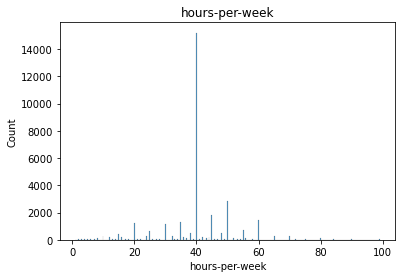

In [50]:
#Visualizing the distribution of the hours per week
plt.figure()
sns.histplot(x='hours-per-week', data=df_census)
plt.xlabel('hours-per-week')
plt.ylabel('Count')
plt.title('hours-per-week')
plt.show()

## Handling Categorical Values

In [52]:
#Applying the label encoder
label = {'<=50K':0, '>50K':1}
df_census1["income"].replace(label, inplace=True)

In [54]:
#creating dummy variables for the other categorical predictors
cat_list = ['education','marital-status','workclass','occupation','relationship','sex','native-country']
for ele in cat_list:
    add = pd.get_dummies(df_census1[ele],drop_first=True, prefix=ele)
    df_census2= df_census1.join(add)
    
#join columns with old dataframe
    df_census1= df_census2
    
# column headers are converted into a list
df_census1_vars =  df_census1.columns.values.tolist()
    
#create a new list by comparing with the list of categorical variables - 'cat_list'
to_keep = [i for i in  df_census1_vars if i not in cat_list]
    
# check the list of headers to make sure no categorical variable remains
print (to_keep)
    
#no more categorical vars .. great
df_census1_final = df_census1[to_keep]
df_census1_final_vars= df_census1_final.columns.values

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', '

In [57]:
#no more categorical values
df_census1.head()
# new dataframe has 101 columns,we would be dropping the unwanted columns

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,Female,0,...,0,0,0,0,0,0,0,1,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,...,0,0,0,0,0,0,0,1,0,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Female,0,...,0,0,0,0,0,0,0,1,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,...,0,0,0,0,0,0,0,1,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
#dropping unwanted column
df_census1.drop(['education','marital-status','workclass','occupation','relationship','sex','native-country'], axis=1, inplace=True)

In [59]:
#Checking the data after introducing dummy variables
df_census1.head(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,education_11th,education_12th,education_1st-4th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
#Grouping data into features and outcome
feature_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'sex_Male',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Cuba',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_France', 'native-country_Germany',
       'native-country_Greece', 'native-country_Guatemala',
       'native-country_Haiti', 'native-country_Holand-Netherlands',
       'native-country_Honduras', 'native-country_Hong',
       'native-country_Hungary', 'native-country_India', 'native-country_Iran',
       'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-country_Poland',
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia']

X = df_census1[feature_names]
y = df_census1.income

### Applying the Single Split

In [62]:
#Splitting the data into training and testing with Sklearn
#Applying the 60%, 40% single split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
stratify=df_census1.income, random_state=0)

In [63]:
#Checking for the dimension of the data
X_train.shape, X_test.shape

((19173, 93), (12782, 93))

In [64]:
y_train.value_counts()

0    14557
1     4616
Name: income, dtype: int64

In [65]:
y_test.value_counts()

0    9705
1    3077
Name: income, dtype: int64

# Training Classification Models

### K Nearest Neighbour (KNN) 

In [67]:
#Applying the KNN
#importing the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#testing
preds = knn.predict(X_test)
# Evaluate accuracy
print(accuracy_score(y_test, preds))

0.7505867626349554


In [68]:
#Changing the neighbours to 5
from sklearn.neighbors import KNeighborsClassifier
#train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
#testing
preds = knn.predict(X_test)
# Evaluate accuracy
print(accuracy_score(y_test, preds))

0.7653731810358316


In [69]:
#Changing the number of neighours to 8
from sklearn.neighbors import KNeighborsClassifier
#train the model

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
#testing
preds = knn.predict(X_test)

# Evaluate accuracy
print(accuracy_score(y_test, preds))

0.7886089813800657


In [70]:
#When K= 10
from sklearn.neighbors import KNeighborsClassifier

#training the model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

#testing
preds = knn.predict(X_test)

#Evaluate accuracy
print(accuracy_score(y_test, preds))

0.7916601470818339


In [71]:
#Applying the confusion matrix to evaluate the accuracy of the classifier

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, preds, labels=[1,0])
data_confusion =pd.DataFrame(np.array(conf_matrix),
index=['>=50k', '<=50k'],
columns = ['Predicted high income', 'low Income'])
print(data_confusion)

       Predicted high income  low Income
>=50k                    623        2454
<=50k                    209        9496


In [72]:
#Getting the classification report 
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, preds, labels=[1,0])
print(conf_matrix)

print(classification_report(y_test, preds))

[[ 623 2454]
 [ 209 9496]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      9705
           1       0.75      0.20      0.32      3077

    accuracy                           0.79     12782
   macro avg       0.77      0.59      0.60     12782
weighted avg       0.78      0.79      0.74     12782



In [73]:
#normalizing the features
#Applying normalization to make the values more comparable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)

#testing
preds_scaled =knn_scaled.predict(X_test_scaled)

# Evaluate accuracy
print(accuracy_score(y_test, preds_scaled))

0.822250039117509


In [74]:
#Confiriming normalization by checking the mean of the age column
X_train_scaled[:,0].mean()

-4.19699394068906e-17

In [75]:
#Confiriming normalization by checking the mean of the final weight (fnlwgt) column
X_train_scaled[:,1].mean()

1.3341437692256615e-17

In [76]:
#Confiriming normalization by checking the standard deviation of the age column
X_train_scaled[:,0].std()

0.9999999999999998

In [77]:
#checking standard deviation of the final weight column to confirm normalization
X_train_scaled[:,1].std()

1.0

### Applying KFold Validation

In [78]:
#Applying the cross validation
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier()
#train model with cv of 5
cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.82294654 0.82894394 0.82633638 0.82524778 0.82237872]
cv_scores mean:0.8251706715254101


### Building the Support Vector Machine Model

In [79]:
#Building the Support Vector Classifier to evaluate the model
from sklearn.svm import SVC
model=SVC(probability=True)

#Training the model using the training set
model.fit(X_train_scaled, y_train)

#Predicting the response for test dataset
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.8443123141918323


### Building the Decision Tree Model

In [80]:
#Building the decision tree Model using all 12 features
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.8116100766703176


### Building the Random Forest Classifier Model

In [81]:
#building the random forest classifier Model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))


0.8515881708652793


### Building the Logistic Regression Model

In [82]:
#Building the logistic regression Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.8493975903614458


### Building the Deep Neural Network Model

In [83]:
#Using one hidden layer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report



model= MLPClassifier(hidden_layer_sizes=(9,), random_state=1, max_iter=300)
#hidden_layer_sizes=(12,6,2,) : three hidden layers of sizes 12,6, and 2
model.fit(X_train_scaled, y_train)
#model.predict_proba(X_test[:1])
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      9705
           1       0.72      0.62      0.67      3077

    accuracy                           0.85     12782
   macro avg       0.80      0.77      0.78     12782
weighted avg       0.84      0.85      0.85     12782



In [84]:
#Using two hidden layers

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report



model= MLPClassifier(hidden_layer_sizes=(8,6,), random_state=1, max_iter=300)
#hidden_layer_sizes=(12,6,2,) : three hidden layers of sizes 12,6, and 2
model.fit(X_train_scaled, y_train)
#model.predict_proba(X_test[:1])
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

#As more layers/ perceptron are being added, the accuracy the accuracy is unchanging


              precision    recall  f1-score   support

           0       0.89      0.92      0.90      9705
           1       0.71      0.64      0.67      3077

    accuracy                           0.85     12782
   macro avg       0.80      0.78      0.79     12782
weighted avg       0.84      0.85      0.85     12782



In [85]:
#Using three hidden layers of the Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

model= MLPClassifier(hidden_layer_sizes=(12,6,2,), random_state=1, max_iter=300)
#hidden_layer_sizes=(12,6,2,) : three hidden layers of sizes 12,6, and 2
model.fit(X_train_scaled, y_train)
#model.predict_proba(X_test[:1])
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.92      0.90      9705
           1       0.71      0.63      0.67      3077

    accuracy                           0.85     12782
   macro avg       0.80      0.77      0.78     12782
weighted avg       0.84      0.85      0.84     12782



### feature Selection

In [87]:
#Applying Feature Ranking with Recursive Feature elimination for 20 features
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
stratify=df_census1.income, random_state=0)




# Select the best 20 features using Feature ranking with RFE
from sklearn.feature_selection import RFE

rfe = RFE(model, 20)  
rfe = rfe.fit(X_train, y_train)

# let's see the 20 selected features
rfe_rankinglist = rfe.ranking_.tolist()
selected_columns = [n for im, n in enumerate(feature_names) 
                    if rfe_rankinglist[im]==1]

print (selected_columns)


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'education_Bachelors', 'education_HS-grad', 'marital-status_Married-civ-spouse', 'marital-status_Never-married', 'workclass_Private', 'workclass_Self-emp-not-inc', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Prof-specialty', 'occupation_Sales', 'relationship_Not-in-family', 'relationship_Wife', 'sex_Male', 'native-country_United-States']


In [88]:
# use the selected features in a RandomForest Classifier and get the accuracy
#for the 20 features
clasf_sel = RandomForestClassifier()
clasf_sel.fit(X_train[selected_columns],y_train)
clasf_sel.score(X_test[selected_columns],y_test)

0.8484587701455172

In [89]:
#Applying Feature Ranking with Recursive Feature elimination for 30 features
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
stratify=df_census1.income, random_state=0)


# Select the best 30 features using Feature ranking with RFE
from sklearn.feature_selection import RFE

rfe = RFE(model, 30)  
rfe = rfe.fit(X_train, y_train)

# let's see the 30 selected features
rfe_rankinglist = rfe.ranking_.tolist()
selected_columns = [n for im, n in enumerate(feature_names) 
                    if rfe_rankinglist[im]==1]

print (selected_columns)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'education_Bachelors', 'education_HS-grad', 'education_Masters', 'education_Some-college', 'marital-status_Married-civ-spouse', 'marital-status_Never-married', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Other-service', 'occupation_Prof-specialty', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'relationship_Not-in-family', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'native-country_United-States']


In [90]:
# use the selected features in a RandomForest Classifier 
#and get the accuracyfor the 30 features
clasf_sel = RandomForestClassifier()
clasf_sel.fit(X_train[selected_columns],y_train)
clasf_sel.score(X_test[selected_columns],y_test)

0.8527616961351902

In [91]:
#Applying Feature Ranking with Recursive Feature elimination for 40 features

#The goal is to select the features which is least important to the model and eliminate themthem
#As and out come, a subset of 40 features would be the outcome

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
stratify=df_census1.income, random_state=0)



# Select the best 40 features using Feature ranking with the RFE

from sklearn.feature_selection import RFE

rfe = RFE(model, 40)  
rfe = rfe.fit(X_train, y_train)

# let's see the 40 selected features
rfe_rankinglist = rfe.ranking_.tolist()
selected_columns = [n for im, n in enumerate(feature_names) 
                    if rfe_rankinglist[im]==1]

print (selected_columns)



C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=40 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'education_Some-college', 'marital-status_Married-civ-spouse', 'marital-status_Never-married', 'marital-status_Separated', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'relationship_Not-in-family', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'native-country_Mexico', 'native-country_United-States']


In [92]:
# using the selected features in a RandomForest Classifier and get the accuracy
#for the 40 features
clasf_sel = RandomForestClassifier()
clasf_sel.fit(X_train[selected_columns],y_train)
clasf_sel.score(X_test[selected_columns],y_test)

0.8507275856673447

[0.66958817 0.72643798 0.74630937 0.78855695 0.82063297 0.82918701
 0.84118328 0.8400878  0.84410371 0.84624219 0.84754641 0.8479113
 0.84942383 0.84968466 0.85041485 0.85104077 0.852553   0.85328337
 0.85323091 0.85156203 0.85208357 0.85229201 0.8521878  0.85161392
 0.85260516 0.85338755 0.85270948 0.85364816 0.85286562 0.85296999
 0.85291778 0.85448276 0.85495208 0.85364821 0.85458699 0.85615168
 0.85474335 0.85484779 0.85427396 0.85589081 0.85437832 0.85427388
 0.85422182 0.85536924 0.85500409 0.85443041 0.85302214 0.85432606
 0.85474313 0.85557781 0.85385665 0.85270935 0.85338713 0.85333516
 0.85307421 0.85281339 0.85406511 0.85411727 0.85396094 0.85333498
 0.85448247 0.85500419 0.85296989 0.85380441 0.85396092 0.85479572
 0.85390863 0.85437811 0.85364806 0.85469128 0.85364815 0.85474343
 0.85406527 0.85250052 0.85359579 0.85281364 0.85328302 0.85270929
 0.85119664 0.85474336 0.85458676 0.85536933 0.85359583 0.85385663
 0.85401314 0.85370011 0.85239628 0.85443045 0.85302214 0.85349

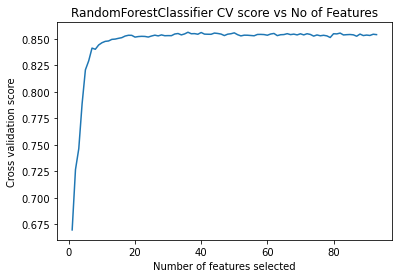

In [94]:
#Training the model with the selected features RFECV
from sklearn.feature_selection import RFECV
logreg_model = RandomForestClassifier()
rfecv = RFECV(estimator=logreg_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)
print(rfecv.grid_scores_)
import matplotlib.pyplot as plt
plt.figure()
plt.title('RandomForestClassifier CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Comparing Classifier Performance

In [95]:
#Investigating the effectiveness of the group of 5 machine learning models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#initializing the classifier models with their default parameters and add them to a model list.
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(probability=True)))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))


In [96]:
#fitting the trained models 
names = []
scores = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)


tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)



  Name     Score
0  KNN  0.822250
1  SVC  0.844312
2   LR  0.849398
3   DT  0.813331
4   RF  0.851588


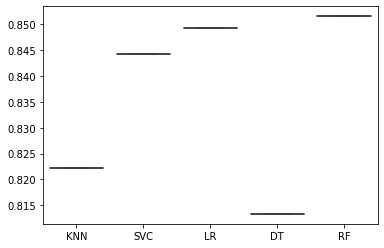

In [97]:
# plot model performance for comparison
sns.boxplot(y=scores, x=names)
plt.show()

### Esemble Learning

In [103]:
#Fusing Classifiers and checking for the predicted class of the first sample

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(probability=True)))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
pred_class=[]
names=[]

for name, model in models:
    model.fit(X_train, y_train)
    #Choosing the sample to be predicted - for each name and model, predict the ist sample from the testing and give me the label.
    y_pred = model.predict(X_test.iloc[0:1,:].to_numpy())
    pred_class.append(y_pred[0])
    names.append(name)
    
Result = pd.DataFrame({'Name': names, 'Pred_class': pred_class})
print(Result)

  Name  Pred_class
0  KNN           0
1  SVC           0
2   LR           0
3   DT           1
4   RF           0


In [102]:
#Fusing classifiers and Checking for the predicted class of 5th samples

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(probability=True)))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
pred_class=[]
names=[]

for name, model in models:
    model.fit(X_train, y_train)
    #Choosing the sample to be predicted - for each name and model, predict the ist sample from the testing and give me the label.
    y_pred = model.predict(X_test.iloc[5:6,:].to_numpy())
    pred_class.append(y_pred[0])
    names.append(name)
    
Result = pd.DataFrame({'Name': names, 'Pred_class': pred_class})
print(Result)

  Name  Pred_class
0  KNN           0
1  SVC           0
2   LR           0
3   DT           0
4   RF           0


### Boosting with five classifiers

In [104]:
#Esemble learning method of combining all of the 5 classifiers for boosting
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[ m for m in models]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')

#fit model to training data
ensemble.fit(X_train_scaled, y_train)

#test our model on the test data
ensemble.score(X_test_scaled, y_test)

0.8519793459552496

In [105]:
#Esemble learning method of combining all of the 5 classifiers for boosting

#Changing the application to hard.

from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[ m for m in models]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train_scaled, y_train)

#test our model on the test data
ensemble.score(X_test_scaled, y_test)

0.8531528712251604

In [ ]:
# Esembles learning model using stacking for all 5 classifiers
from sklearn.ensemble import StackingClassifier
estimators = [('rf', RandomForestClassifier()),
('svc', SVC(probability=True)),
('dt', DecisionTreeClassifier())]
lr = LogisticRegression()
sclf = StackingClassifier(estimators=estimators,
final_estimator=lr)
sclf.fit(X_train_scaled, y_train)
sclf.score(X_test_scaled, y_test)

#The accuracy result for the 5 classifiers did bettwer than the boosting method.

### Boosting with two classifiers

In [117]:
#Investigating the effectiveness with three machine learning models:LR,& RF
#the classifiers are been evaluated using their default model hyperparameters.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#initializing the classifier models with their default parameters and add them to a model list.
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))


In [119]:
#fitting the trained models 
names = []
scores = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)


tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0   LR  0.849398
1   RF  0.849945


In [120]:
#Esemble learning method of combining two classifiers for boosting

from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[ m for m in models]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')

#fit model to training data
ensemble.fit(X_train_scaled, y_train)

#test our model on the test data
ensemble.score(X_test_scaled, y_test)

0.8562822719449226

In [121]:
# Esembles learning model using stacking for 3 classifiers
from sklearn.ensemble import StackingClassifier
estimators = [('rf', RandomForestClassifier()),
('svc', SVC(probability=True)),
('dt', DecisionTreeClassifier())]
lr = LogisticRegression()
sclf = StackingClassifier(estimators=estimators,
final_estimator=lr)
sclf.fit(X_train_scaled, y_train)
sclf.score(X_test_scaled, y_test)

0.8576122672508215

### Boosting with two classifiers

In [122]:
#Investigating the effectiveness of the group of two machine learning models which are the KNN,SVC, LR,DT & RF
#the classifiers are been evaluated using their default model hyperparameters.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#initializing the classifier models with their default parameters and add them to a model list.
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))

#The decision tree and KNN were removed because their score showed that they were weak classifiers

In [123]:
#fitting the trained models 
names = []
scores = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)


tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

#The SVC was further removed, accuracy scores of the three machine learning algorithms still reveals the random forest out performed all the other two classifiers with the highest score, and the accuracy of the linear Regressor did better than the Support vector machine with the use of just three classifiers.
#The conclusion is that theinclusion of the week classifier to the overall classifier, made their performed poor compared to performance of the combination of two and three classifiers. It is obvious that the weak classifiers contributed poorly to the performance of the overall classifiers
# 

  Name     Score
0   LR  0.849398
1   RF  0.849398


In [124]:
#Esemble learning method of combining all of the 2 classifiers for boosting

#Changing the application to hard.

from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[ m for m in models]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')

#fit model to training data
ensemble.fit(X_train_scaled, y_train)

#test our model on the test data
ensemble.score(X_test_scaled, y_test)

#The accuracy score improved

0.8565952120168988